C:\Users\BykovF\AppData\Local\Temp\ipykernel_8260\4266187453.py:29: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower right', frameon=True, fancybox=True, shadow=True)


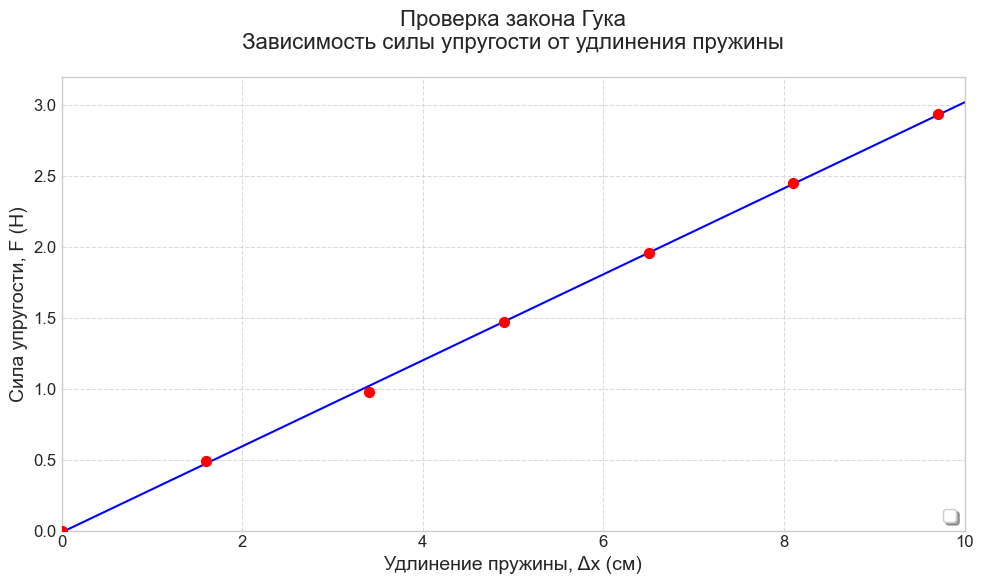

In [41]:
#Упражнение 4.1
import matplotlib.pyplot as plt
import numpy as np

F = np.array([0.00, 0.49, 0.98, 1.47, 1.96, 2.45, 2.94])
delta_x = np.array([0.000, 0.016, 0.034, 0.049, 0.065, 0.081, 0.097])

coefficients = np.polyfit(delta_x, F, 1)
k = coefficients[0]  
b = coefficients[1]  

x_fit = np.linspace(0, 0.1, 100)
y_fit = k * x_fit + b

plt.figure(figsize=(10, 6))
plt.rcParams['font.size'] = 12

plt.scatter(delta_x * 100, F, color='red', s=50, zorder=5)
plt.plot(x_fit * 100, y_fit, 'b-', linewidth=1.5)

plt.xlabel('Удлинение пружины, Δx (см)', fontsize=14)
plt.ylabel('Сила упругости, F (Н)', fontsize=14)
plt.title('Проверка закона Гука\nЗависимость силы упругости от удлинения пружины', fontsize=16, pad=20)

plt.xlim(0, 10)
plt.ylim(0, 3.2)
plt.grid(True, linestyle='--', alpha=0.7)

plt.legend(loc='lower right', frameon=True, fancybox=True, shadow=True)
plt.tight_layout()
plt.show()

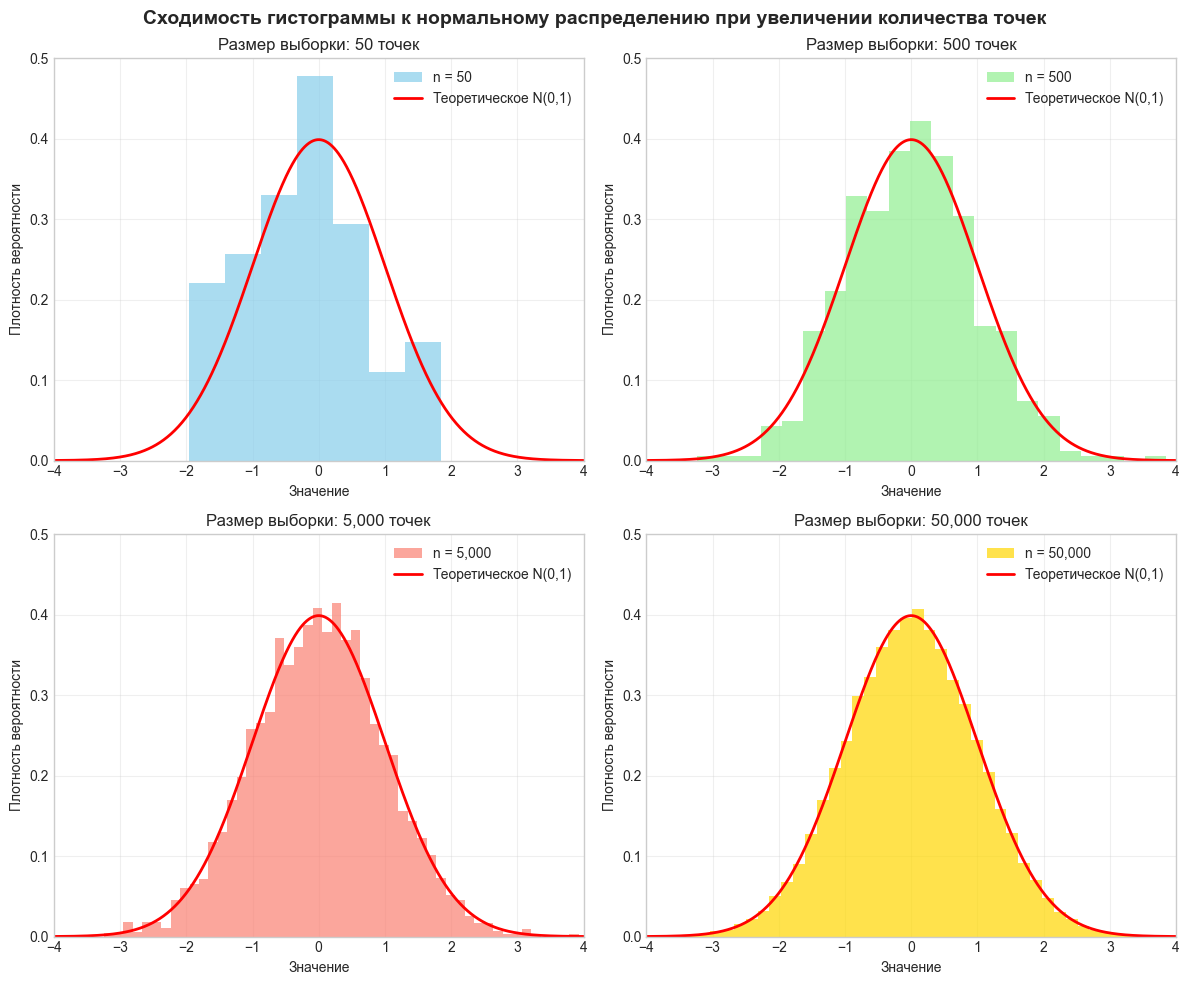

In [38]:
# Упражнение 4.2
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

plt.style.use('seaborn-v0_8-whitegrid')
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Сходимость гистограммы к нормальному распределению при увеличении количества точек', 
             fontsize=14, fontweight='bold')

mu, sigma = 0, 1
sample_sizes = [50, 500, 5000, 50000] 

# Цвета для гистограмм
colors = ['skyblue', 'lightgreen', 'salmon', 'gold']

for i, (ax, n, color) in enumerate(zip(axes.flat, sample_sizes, colors)):
    np.random.seed(42)  
    data = np.random.normal(mu, sigma, n)
    
    n_bins = min(50, int(np.sqrt(n)))  
    counts, bins, patches = ax.hist(data, bins=n_bins, density=True, 
                                   alpha=0.7, color=color, 
                                   label=f'n = {n:,}')
    
    x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
    y = norm.pdf(x, mu, sigma)
    ax.plot(x, y, 'r-', linewidth=2, label='Теоретическое N(0,1)')
    
    ax.set_xlabel('Значение')
    ax.set_ylabel('Плотность вероятности')
    ax.set_title(f'Размер выборки: {n:,} точек')
    ax.legend()
    ax.grid(True, alpha=0.3)
    

    ax.set_xlim(-4, 4)
    ax.set_ylim(0, 0.5)

plt.tight_layout()
plt.show()

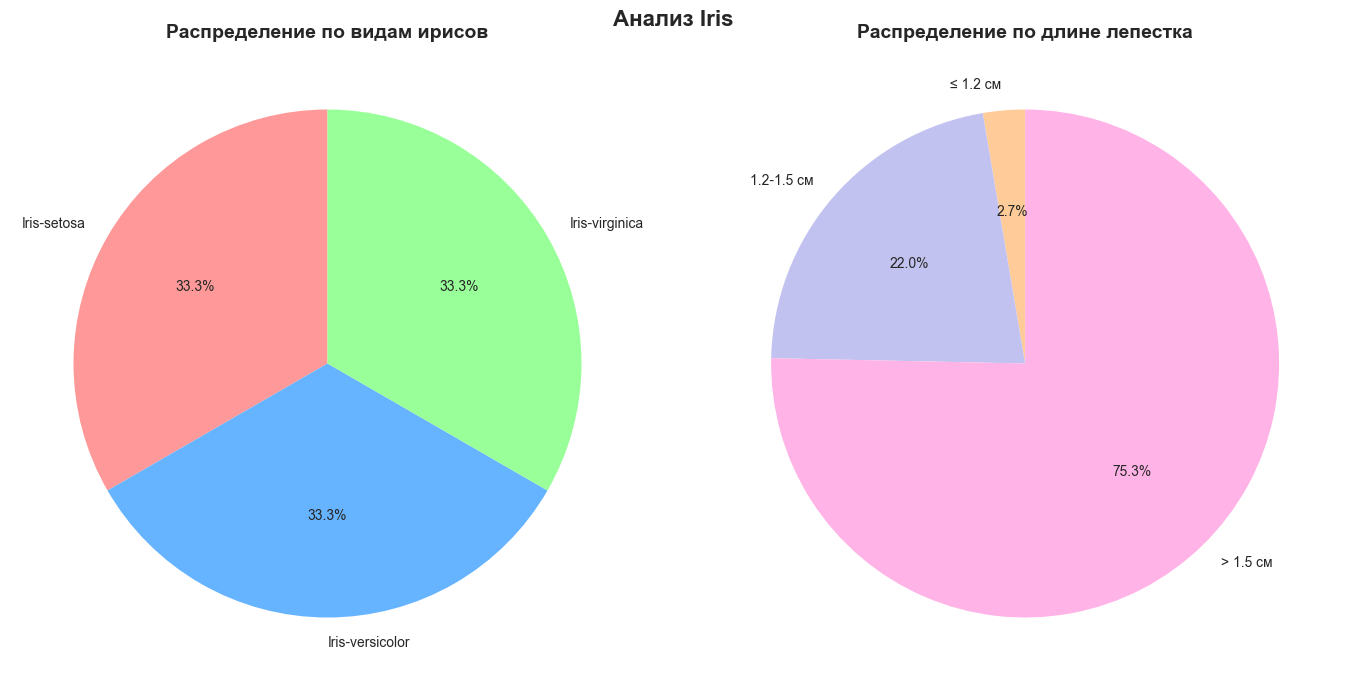

In [ ]:
#Упражнение 4.3
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('iris_data.csv')


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))


species_counts = df['Species'].value_counts()
colors_species = ['#ff9999', '#66b3ff', '#99ff99']
ax1.pie(species_counts.values, labels=species_counts.index, autopct='%1.1f%%', 
        colors=colors_species, startangle=90)
ax1.set_title('Распределение по видам ирисов', fontsize=14, fontweight='bold')


petal_length = df['PetalLengthCm']


count_leq_1_2 = len(df[df['PetalLengthCm'] <= 1.2])
count_1_2_to_1_5 = len(df[(df['PetalLengthCm'] > 1.2) & (df['PetalLengthCm'] <= 1.5)])
count_gt_1_5 = len(df[df['PetalLengthCm'] > 1.5])

categories = ['≤ 1.2 см', '1.2-1.5 см', '> 1.5 см']
counts = [count_leq_1_2, count_1_2_to_1_5, count_gt_1_5]

colors_length = ['#ffcc99', '#c2c2f0', '#ffb3e6']
ax2.pie(counts, labels=categories, autopct='%1.1f%%', 
        colors=colors_length, startangle=90)
ax2.set_title('Распределение по длине лепестка', fontsize=14, fontweight='bold')


plt.suptitle('Анализ Iris', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [33]:
#Упражнение 4.8
list1 = [1, 2, 3, 4, 5, 6, 7]
list2 = [5, 6, 7, 8, 9, 10]

set1 = set(list1)
set2 = set(list2)

unique_to_list1 = set1 - set2
unique_to_list2 = set2 - set1

all_unique = set1 ^ set2  
print("Уникальные для объединения списков (симметрическая разность):", sorted(all_unique))

common_elements = set1 & set2
print("Содержащиеся в обоих списках (пересечение):", sorted(common_elements))

print("Объединение списков:", sorted(set1 | set2))


Уникальные для объединения списков (симметрическая разность): [1, 2, 3, 4, 8, 9, 10]
Содержащиеся в обоих списках (пересечение): [5, 6, 7]
Объединение списков: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
